**CMPE258**

**Homework 1 - Fast AI.Kears colabs redone**

**Sangwon Song**

**Colab Link:** https://colab.research.google.com/drive/1HKUN5qid7Ynv06a7fdUU0P6iBAbaLvEf


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
bs = 64

In [3]:
help(untar_data)


Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [10]:
path = untar_data(URLs.PLANET_SAMPLE); # Planet images
path


PosixPath('/root/.fastai/data/planet_sample')

In [11]:
path.ls()


[PosixPath('/root/.fastai/data/planet_sample/labels.csv'),
 PosixPath('/root/.fastai/data/planet_sample/train')]

In [0]:
path_img = path/'train'


In [15]:
fnames = get_image_files(path_img)
fnames[:7]

[PosixPath('/root/.fastai/data/planet_sample/train/train_20353.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_25309.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_7.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_37375.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_19162.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_26750.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_12787.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$' # regular expression for text class from file names
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

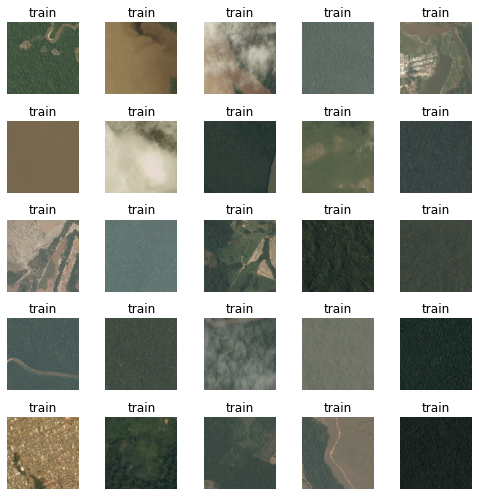

In [17]:
data.show_batch(row=4, figsize=(7,7))

In [18]:
print(data.classes)
len(data.classes), data.c

['train']


(1, 1)

**Training: resnet34**

In [19]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:07
1,0.000000,0.000000,0.000000,00:07
2,0.000000,0.000000,0.000000,00:07
3,0.000000,0.000000,0.000000,00:07


In [0]:
learn.save('stage-1')

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

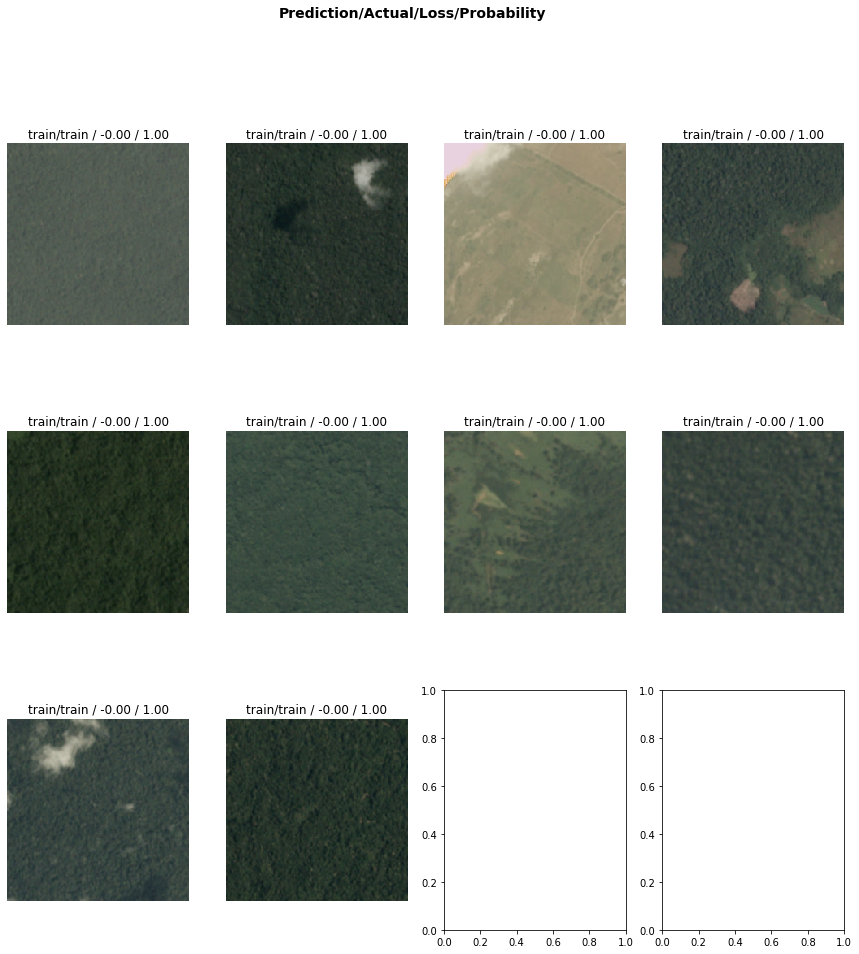

In [23]:
interp.plot_top_losses(10, figsize=(15,15))

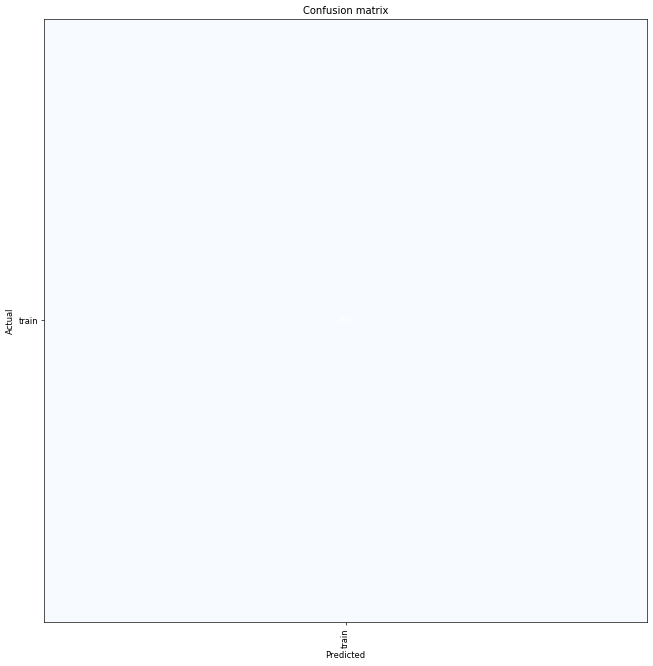

In [24]:
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(11,11), dpi=60)

The result above was expected because in my case, there are only "train" classes

In [25]:
interp.most_confused(min_val=2)

[]